# Carregar a base de dados


In [3]:
df = pd.read_csv('conceitos_mapeados.csv', delimiter=';')


In [4]:
df

,Grupo de documentos,Nome do documento,Ano,Conceito,Segmento,Cobertura %,Página
0,RIHGB,rihgb1839t0001,1839.0,educación,FUNDOS \nOs Srs.: T ho mil M aria da Fonseca....,"0,0746174",10
1,RIHGB,rihgb1839t0001,1839.0,educación,DISCURSO \nProcura... r.-íUseilar tambíui as ...,"0,0295028",11
2,RIHGB,rihgb1839t0001,1839.0,educación,nosso Instituto : olla olTerecu um campo vastí...,"0,080518",12
3,RIHGB,rihgb1839t0001,1839.0,educación,do serem lidas; e muito mais beneméritos ain...,"0,0764613",15
4,RIHGB,rihgb1839t0001,1839.0,educación,a olfalto a proposta que lbe havíamos submet...,"0,0785511",17
...,...,...,...,...,...,...,...
310841,Revista Americana do Itamaraty,Revista Americana n1,1920.0,cultura,"Fricdrich Naumann, o autor do grandioso plano ...","0,095251216",306
310842,Revista Americana do Itamaraty,Revista Americana n1,1920.0,cultura,até os melhores commerciantes. ” \nLudwig Wolt...,"0,077030532",306
310843,Revista Americana do Itamaraty,Revista Americana n1,1920.0,cultura,"REVISTA AMERICANA 31S \nrespeito, a Allcmanha ...","0,067994258",315
310844,Revista Americana do Itamaraty,Revista Americana n1,1920.0,cultura,"Allcmanha. \naté Wagner, o genial creador do d...","0,08695562",315


## Cria a Matriz de conconrrência a partir das rotulações nos pdf's

In [5]:
import pandas as pd
from itertools import combinations
from collections import defaultdict



# Criar um dicionário para armazenar as coocorrências de conceitos
cooccurrence_dict = defaultdict(int)

# Agrupar os dados por documento e página
grouped = df.groupby(['Nome do documento', 'Página'])

# Percorrer cada grupo (cada combinação de documento e página)
for _, group in grouped:
    conceitos = group['Conceito'].unique()  # Obter conceitos únicos na página
    # Gerar combinações únicas de dois conceitos
    for conceito1, conceito2 in combinations(conceitos, 2):
        # Ordenar para evitar duplicatas (A-B e B-A são a mesma coocorrência)
        if conceito1 > conceito2:
            conceito1, conceito2 = conceito2, conceito1
        cooccurrence_dict[(conceito1, conceito2)] += 1

# Transformar o dicionário de coocorrências em um DataFrame
cooccurrence_df = pd.DataFrame(
    [(key[0], key[1], value) for key, value in cooccurrence_dict.items()],
    columns=['Conceito 1', 'Conceito 2', 'Frequência']
)

# Salvar o resultado como CSV
cooccurrence_df.to_csv('matriz_coocorrencia.csv', index=False)


In [6]:
cooccurrence_df # Visualizando a matriz

,Conceito 1,Conceito 2,Frequência
0,progresso,tempo,1364
1,conceitos gerais,progresso,543
2,cultura,progresso,622
3,conceitos gerais,tempo,2686
4,cultura,tempo,1577
...,...,...,...
2521,America Austral,America-Latina,1
2522,America Austral,Tradição,1
2523,America Oriental,ensino,1
2524,America Austral,America meridional,1


# Agora é possível criar um gráfico a partir da viarável cooccurrence_df, criada para salvar a tabela comparativa

C:\Users\Alesson\AppData\Local\Temp\ipykernel_3960\3718108780.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_concepts = cooccurrence_df['Conceito 1'].append(cooccurrence_df['Conceito 2']).unique()


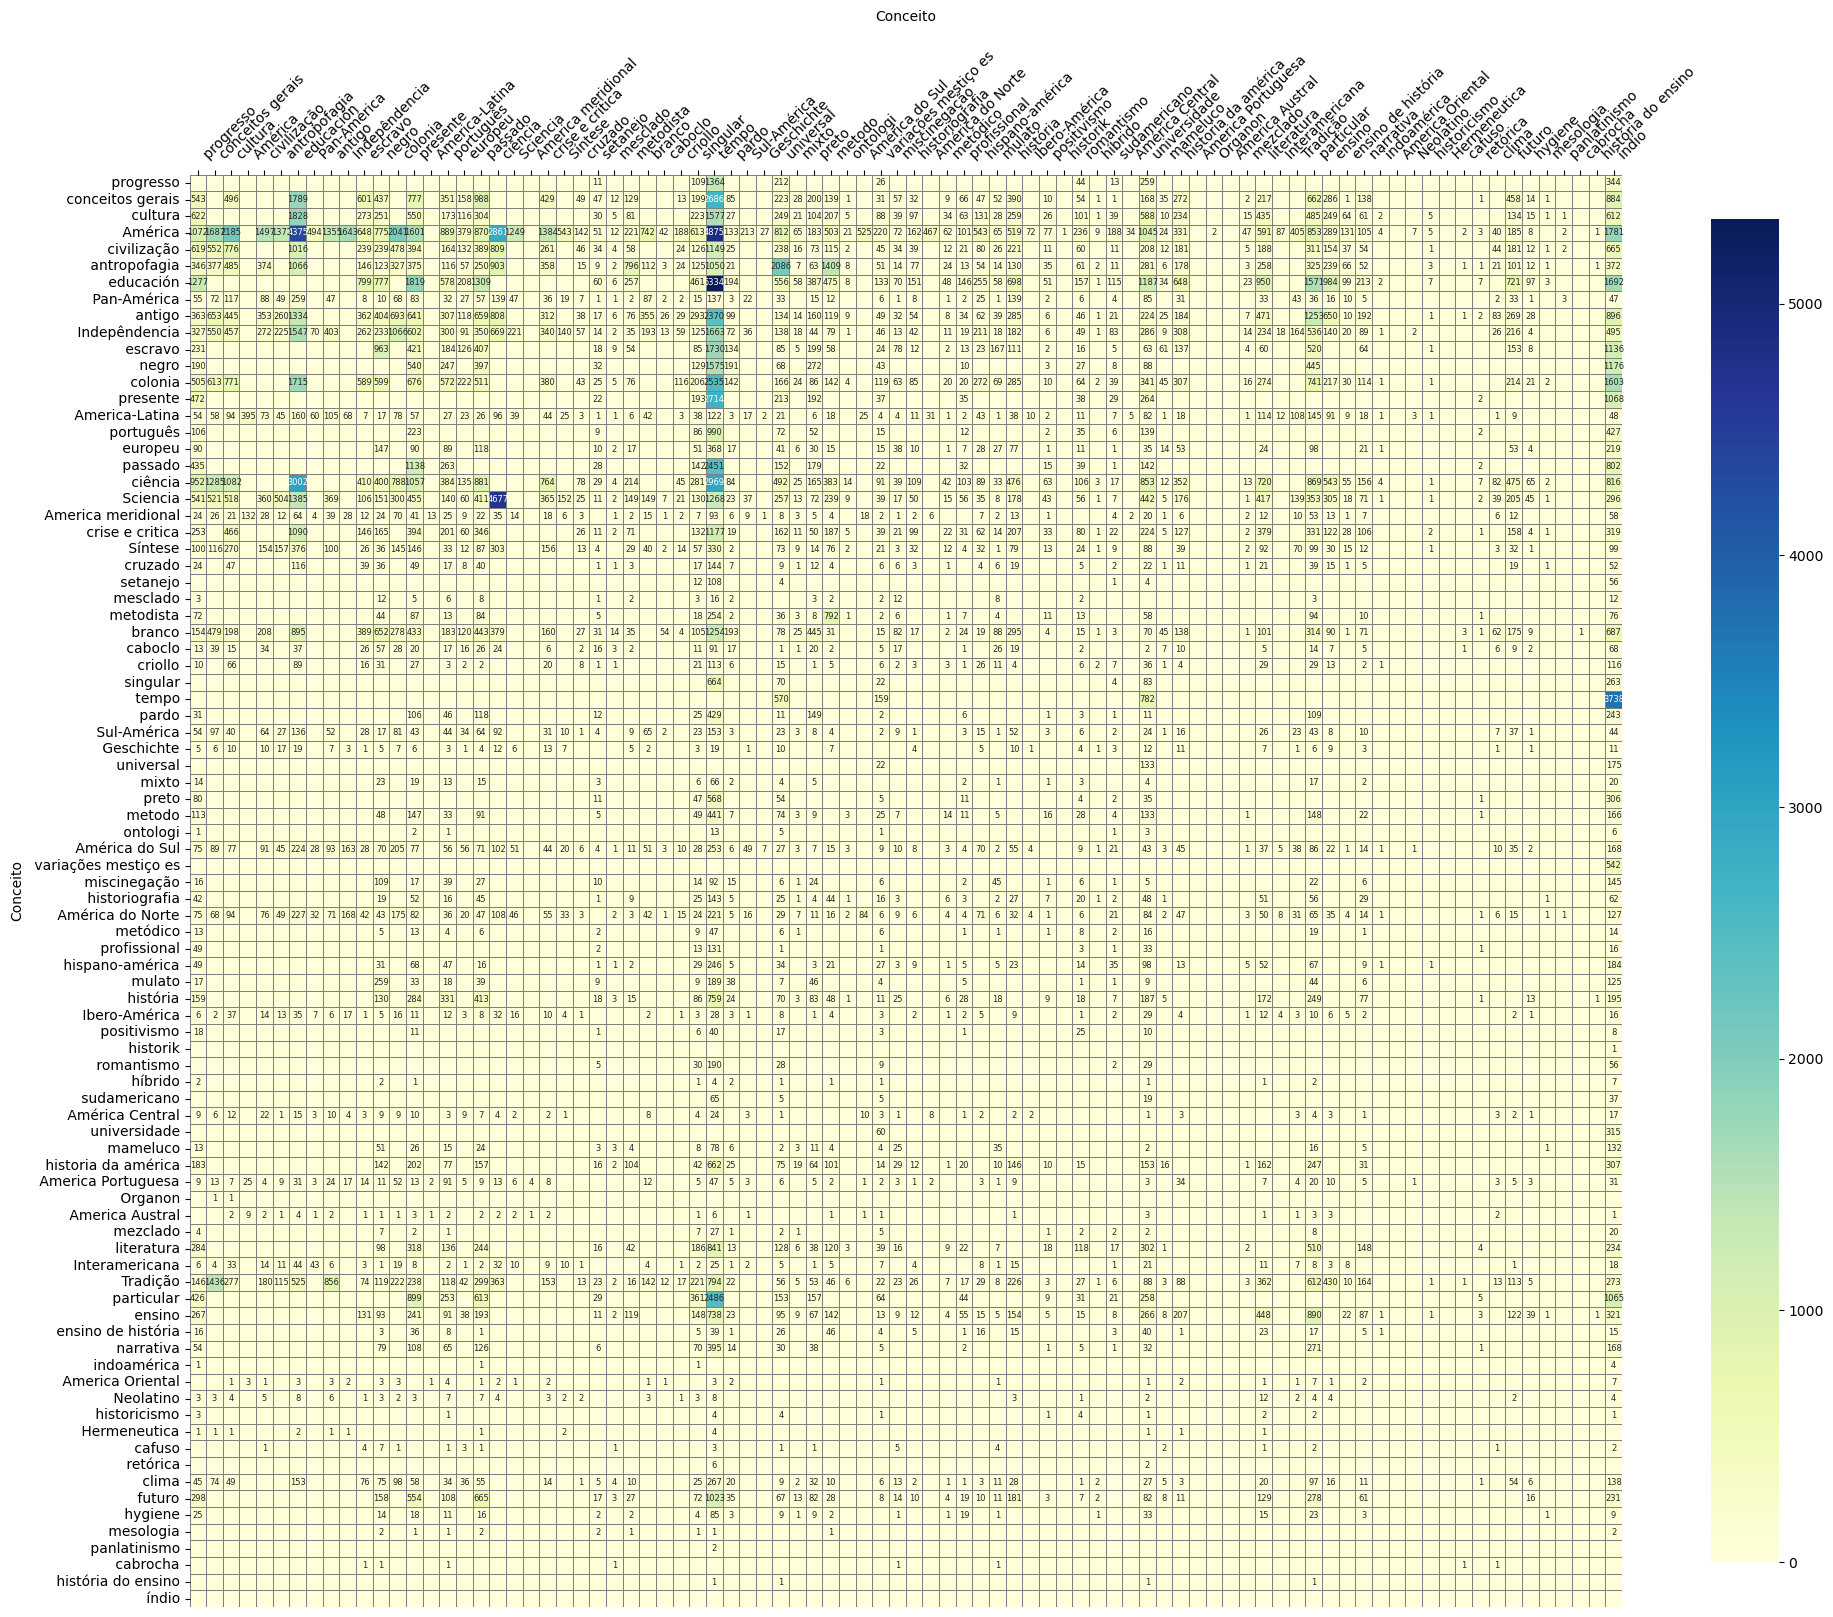

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o DataFrame de coocorrência
cooccurrence_df = pd.read_csv('matriz_coocorrencia.csv')

# Verificar se o DataFrame está vazio
if cooccurrence_df.empty:
    raise ValueError("O DataFrame de coocorrência está vazio. Verifique os dados.")

# Criar a matriz de coocorrência em formato de tabela
cooccurrence_matrix = cooccurrence_df.pivot_table(
    index='Conceito 1', columns='Conceito 2', values='Frequência', fill_value=0
)

# Tornar a matriz completamente simétrica adicionando conceitos ausentes
all_concepts = cooccurrence_df['Conceito 1'].append(cooccurrence_df['Conceito 2']).unique()
cooccurrence_matrix = cooccurrence_matrix.reindex(index=all_concepts, columns=all_concepts, fill_value=0)

# Criar uma matriz de anotação onde os zeros serão representados como strings vazias
annot_matrix = cooccurrence_matrix.applymap(lambda x: '' if x == 0 else int(x))

# Configurar o tamanho da figura, o tamanho das células e o tamanho da fonte das anotações
plt.figure(figsize=(20, 18))
heatmap = sns.heatmap(
    cooccurrence_matrix, cmap="YlGnBu", annot=annot_matrix, fmt="", 
    cbar=True, linewidths=0.5, linecolor='gray', square=True,
    cbar_kws={'shrink': 0.5}, annot_kws={"size": 6}
)  # Ajuste o tamanho da fonte com 'size'

# Configurar rótulos do eixo X na parte superior e inferior
heatmap.xaxis.set_ticks_position('top')
heatmap.xaxis.set_label_position('top')
plt.xlabel("Conceito", labelpad=20)  # Rótulo inferior
plt.ylabel("Conceito")

# Adicionar o rótulo superior diretamente no eixo X
plt.gca().xaxis.set_label_coords(0.5, 1.05)  # Centralizar o rótulo na parte superior sem texto adicional

# Rotacionar rótulos para melhor visualização
plt.xticks(rotation=45, ha='left')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()
